<a href="https://colab.research.google.com/github/pradosh2024/langgraph_playground/blob/main/001_helloworld.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
%pip install langgraph --quiet

In [2]:
#Build a hello world introductory langgraph

from typing import  Dict,TypedDict
from langgraph.graph import StateGraph



In [24]:
# We now create an AgentState - shared data structure that keeps track of information as your application runs.

class AgentState(TypedDict):
    message: str

def greeting_node(state:AgentState) -> AgentState:
    """Simple node that adds a greeting message to the state"""
    state["message"] = "Hey " + state["message"] + ", How is your day going?"
    return state


In [26]:
#Now it is to time compile and create the stategraph

graph = StateGraph(AgentState)

graph.add_node("greeter",greeting_node)

# Link it to start and end
graph.set_entry_point("greeter")
graph.set_finish_point("greeter")
app = graph.compile()

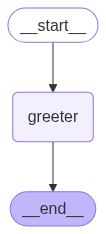

In [21]:
from IPython.display import Image,display
display(Image(app.get_graph().draw_mermaid_png()))

In [27]:
result = app.invoke({"message" : "Ram"})

result["message"]

'Hey Ram, How is your day going?'

### Why did you access with dictionary like notation to access message variable?

- While you defined AgentState using the class keyword, TypedDict is not a regular Python class in the sense that you would create instances with methods and attribute access using dots. Instead, TypedDict is a special construct from the typing module primarily used for type hinting.

- When you define AgentState(TypedDict):, you are essentially telling Python's type checker that any object annotated with the type AgentState should have keys named message (and greeting after your greeting_node function runs) and that the values associated with those keys should be of the specified types (string in this case).

- The objects that conform to this AgentState type are just regular Python dictionaries. When you create an instance that matches the AgentState type, you are creating a dictionary that has the structure and types defined by AgentState.

#### Think of TypedDict as a blueprint or a schema for a dictionary. It defines what keys and value types are expected, but the actual object created based on this blueprint is a standard dictionary.

This is why you access its elements using dictionary-like bracket notation (state["message"]) rather than object-like dot notation (state.message).

### What does stategraph refers to?

The term "StateGraph" in LangGraph specifically refers to a type of graph where:

- Nodes represent functions or logic: Each node in a StateGraph is typically a function or a piece of logic that performs a specific task. In your example, greeting_node is one such node.

- Edges represent transitions: The connections between nodes (the edges of the graph) represent how the process moves from one node to the next. These transitions can be conditional, meaning the next node to execute can depend on the output of the current node.
- A shared state is passed between nodes: This is the key distinguishing feature of a StateGraph. There is a single data structure (your AgentState in this case) that is passed from node to node. Each node can read from and write to this shared state.

#### So, while a general graph can represent various relationships between entities, a StateGraph in LangGraph is specifically designed to model sequential or conditional processes where a shared state evolves as it passes through different processing steps (nodes).

Think of it like a flowchart where each box (node) does something to a piece of data (the state), and the arrows (edges) show where the data goes next.


### Can a `StateGraph` handle multiple different state objects, and how would it interact with them?

- In LangGraph, a single StateGraph instance is designed to work with one unified state object. This state object, which you define using a TypedDict like your AgentState, acts as the central source of truth that all the nodes in that specific StateGraph interact with.

- Think of the state object as a single blackboard that all the different nodes can read from and write to. Each node might only be interested in or modify specific parts of that blackboard, but they all share the same one.

- If you need to manage different types of information that don't naturally fit into a single unified state object, you would typically address this in a few ways:

- Consolidate into a single TypedDict: If the different pieces of information are related to the same overall process, you can often include them as different keys within your single AgentState TypedDict.
Use multiple StateGraph instances: If you have distinct, independent processes that each require their own state, you would create separate StateGraph instances for each process.
- Nodes that interact with external systems: Some nodes might interact with external databases, APIs, or other systems that hold different types of data. These nodes would read from the shared StateGraph state to determine what external data to fetch or modify, and they might update the StateGraph state with results from the external system.


So, to directly answer your question, a single StateGraph instance works with one type of state object. If you have fundamentally different sets of state you need to manage, you would structure your application using multiple StateGraph instances or design your single state object to encompass all necessary information.



## Exercise -1

## Create a personalized compliment agent

In [14]:
# create a function to compliment - this is basically the tool what the node would call

def compliment_node(compliment:AgentState) -> AgentState:
    """Simple node that adds a compliment message to the state"""
    compliment["message"] = compliment["message"] + ", you are doing an amazing job learning langgraph"
    return compliment

In [15]:
#create a stategraph

compliment_graph = StateGraph(AgentState)

compliment_graph.add_node("compliment",compliment_node)

compliment_graph.set_entry_point("compliment")
compliment_graph.set_finish_point("compliment")
compliment_app = compliment_graph.compile()

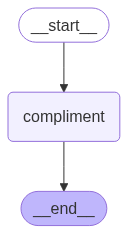

In [16]:
display(Image(compliment_app.get_graph().draw_mermaid_png()))

In [17]:
compliment_result = compliment_app.invoke({"message" : "Ram"})

compliment_result["message"]

'Ram, you are doing an amazing job learning langgraph'